# Zombie Apocalypse

Adjust the parameters in the model to find the ones that will give the best chance for defeating the zombies. What can you conclude from your results? What should we focus on, in terms of defeating the army of the dead?

Hypotheses: A high zombie final removal rate will probably contribute to humanity's survival, since the fewer zombies there are, the less likely you are to get attacked by one. Low transmission rates and resurrection percentages should also result in fewer zombies. It is not immediately clear how the birth rate and death rate will affect humanity's survival, since more humans means more zombies, assuming only humans can be turned into zombies.

Results: My hypotheses were generally correct. The birth rate did not seem to affect humanity's survival rate, though that could be because I only tried values that were roughly the same order of magnitude. Perhaps if I had varied them more, there could have been a more obvious effect, though it would be less realistic. The death rate, however, did have a slight effect on humanity's survival. A lower death rate seems to result in humanity surviving for a few days more than when there was a higher death rate. This makes sense, since a higher death rate means there are more dead people that could be turned into zombies.

Low transmission percentages and low resurrection percentages both resulted in a higher chance for humanity's survival, which means that in the case of a zombie apocalypse, it is important to try and create vaccines to limit the possibility of someone getting infected, and to also dispose of the dead in such a way that they cannot come back as zombies. A high zombie removal rate will also result in a higher chance for humanity's survival, but certain values for this rate could cause crazy fluctuations between the susceptible, zombie, and removed populations (alpha = 0.05). It is better to try and prevent new zombies being made, than to destroy the zombies that exist. Also, if the main methods for ending zombies involves close combat of any kind, the transmission rate will increase, resulting in more zombies.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [58]:
# Define the system of ODEs
def derivative(X, t, Pi, delta, beta, zeta, alpha):
    S, Z, R = X
    dotS = Pi - beta * S * Z - delta * S
    dotZ = beta * S * Z + zeta * R - alpha * Z * S
    dotR = delta * S + alpha * Z * S - zeta * R
    return np.array([dotS, dotZ, dotR])

def Euler(func, X0, t, Pi, delta, beta, zeta, alpha):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt - 1):
        X[i + 1] = X[i] + func(X[i], t[i], Pi, delta, beta, zeta, alpha) * dt
    return X

def RK4(func, X0, t, Pi, delta, beta, zeta, alpha):
    """
    RK4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt - 1):
        k1 = func(X[i], t[i], Pi, delta, beta, zeta, alpha)
        k2 = func(X[i] + k1 * dt / 2, t[i] + dt / 2, Pi, delta, beta, zeta, alpha)
        k3 = func(X[i] + k2 * dt / 2, t[i] + dt / 2, Pi, delta, beta, zeta, alpha)
        k4 = func(X[i] + k3 * dt, t[i] + dt, Pi, delta, beta, zeta, alpha)
        X[i + 1] = X[i] + (k1 + 2 * k2 + 2 * k3 + k4) * dt / 6
    return X

In [59]:
def solve_and_graph(derivative, X0, t, Pi, delta, beta, zeta, alpha):
    # Solve the system of ODEs
    X = integrate.odeint(derivative, X0, t, args=(Pi, delta, beta, zeta, alpha))
    S, Z, R = X.T  #X.T order 3 x (Nt+1)
    Xe = Euler(derivative, X0, t, Pi, delta, beta, zeta, alpha)
    Xrk = RK4(derivative, X0, t, Pi, delta, beta, zeta, alpha)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    
    ax1.plot(t, S, 'orange', label='Susceptible')
    ax1.plot(t, Z, 'r', label='Zombie')
    ax1.plot(t, R, 'g', label='Removed')
    ax1.set_ylabel('Population')
    ax1.legend()
    
    ax2.set_title("Euler")
    ax2.plot(t, Xe[:,0], 'orange', label='Susceptible')
    ax2.plot(t, Xe[:,1], 'r', label='Zombie')
    ax2.plot(t, Xe[:,2], 'g', label='Removed')
    ax2.set_ylabel('Population')
    ax2.legend()
    
    ax3.set_title("RK4")
    ax3.plot(t, Xrk[:,0], 'orange', label='Susceptible')
    ax3.plot(t, Xrk[:,1], 'r', label='Zombie')
    ax3.plot(t, Xrk[:,2], 'g', label='Removed')
    ax3.set_xlabel('Time t, [days]')
    ax3.set_ylabel('Population')
    ax3.legend()
    
    fig.set_size_inches(16, 5)

/var/folders/b0/dwb777wj5bs66r0m14n6j1gc0000gn/T/ipykernel_21584/2608378335.py:4: RuntimeWarning: overflow encountered in scalar multiply
  dotS = Pi - beta * S * Z - delta * S
/var/folders/b0/dwb777wj5bs66r0m14n6j1gc0000gn/T/ipykernel_21584/2608378335.py:5: RuntimeWarning: overflow encountered in scalar multiply
  dotZ = beta * S * Z + zeta * R - alpha * Z * S
/var/folders/b0/dwb777wj5bs66r0m14n6j1gc0000gn/T/ipykernel_21584/2608378335.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  dotZ = beta * S * Z + zeta * R - alpha * Z * S
/var/folders/b0/dwb777wj5bs66r0m14n6j1gc0000gn/T/ipykernel_21584/2608378335.py:6: RuntimeWarning: overflow encountered in scalar multiply
  dotR = delta * S + alpha * Z * S - zeta * R


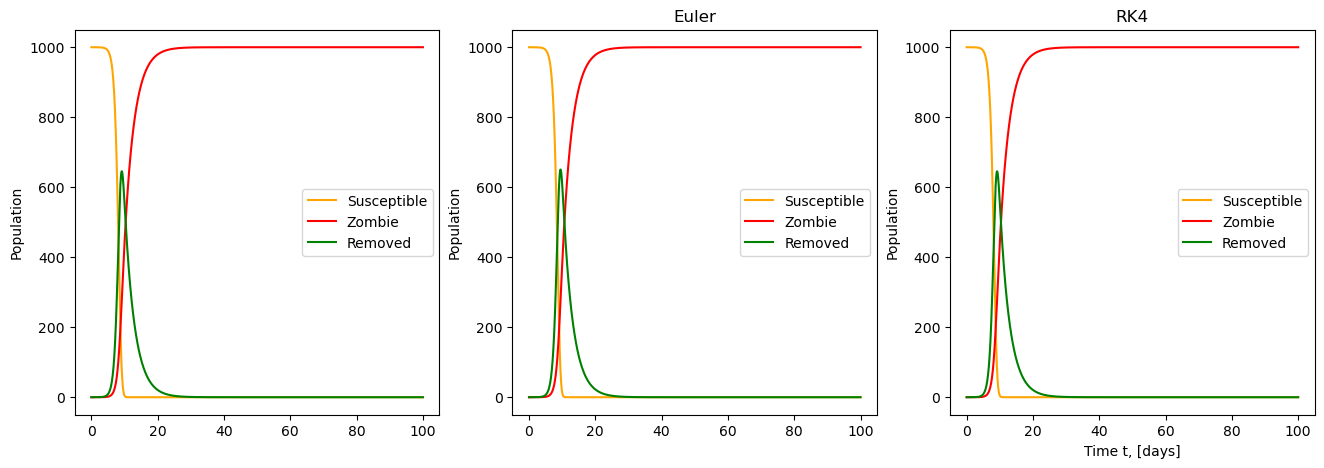

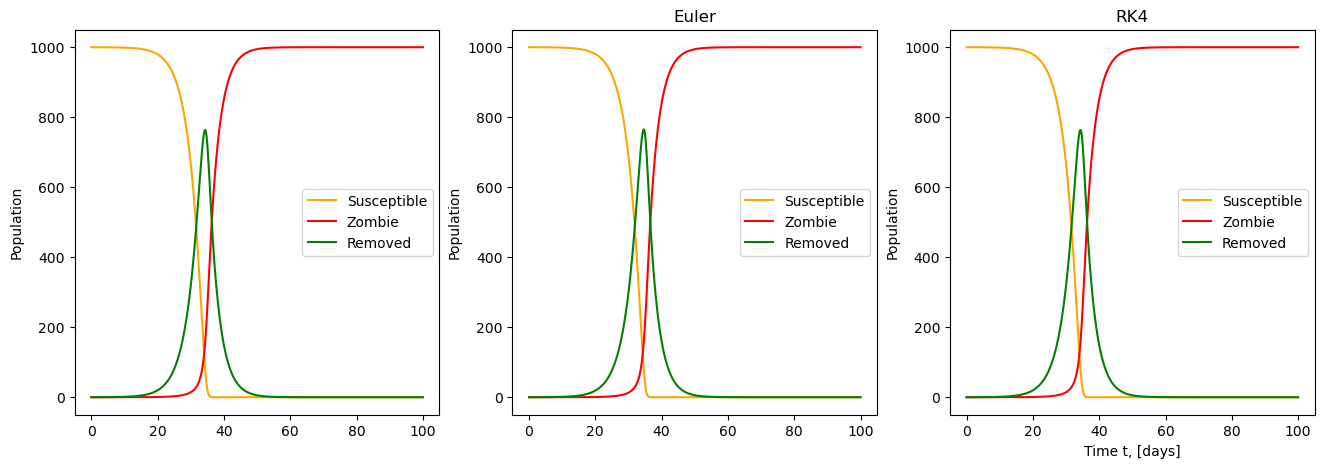

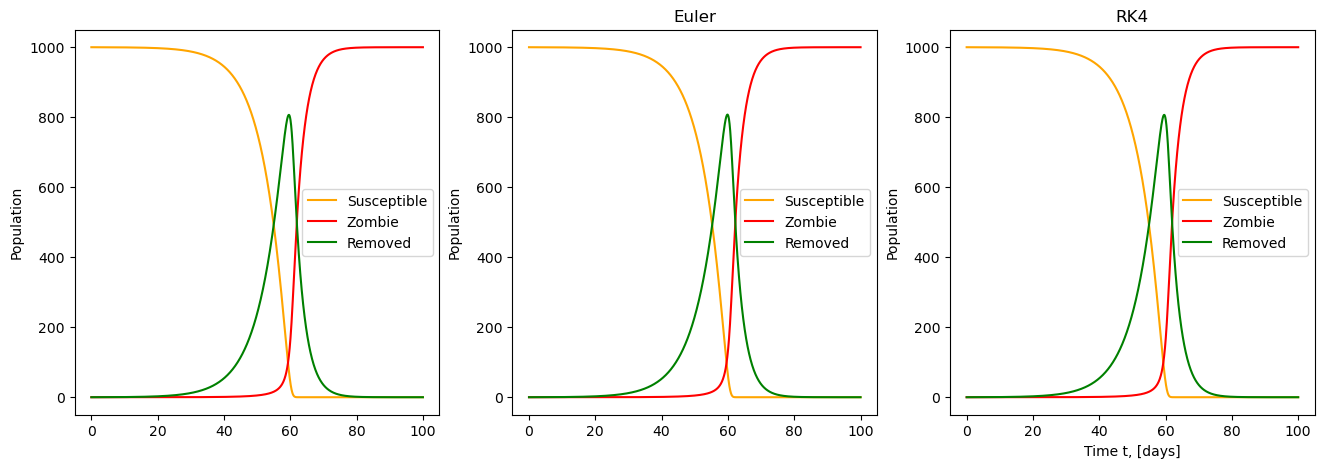

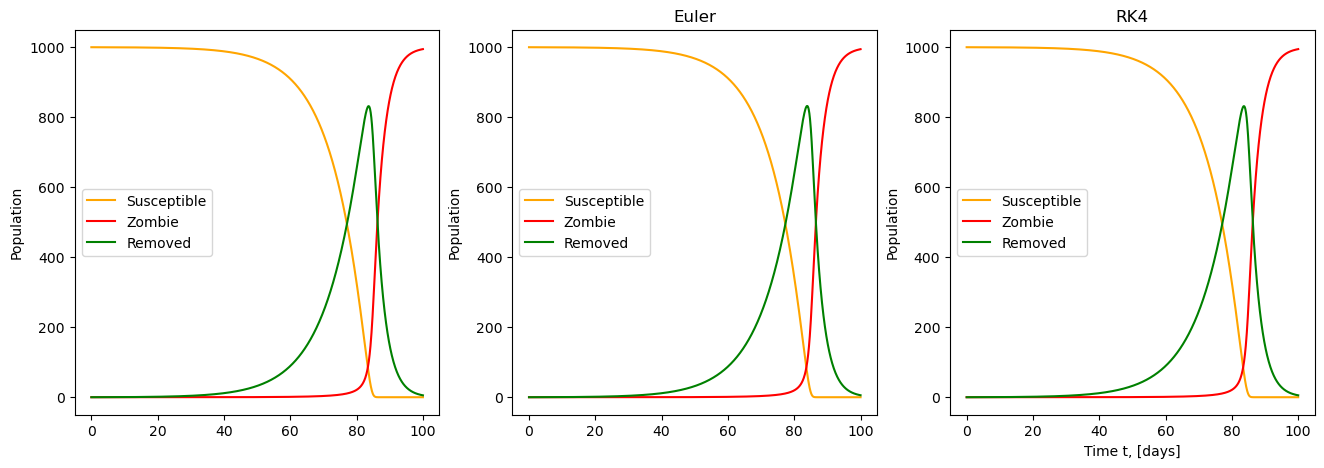

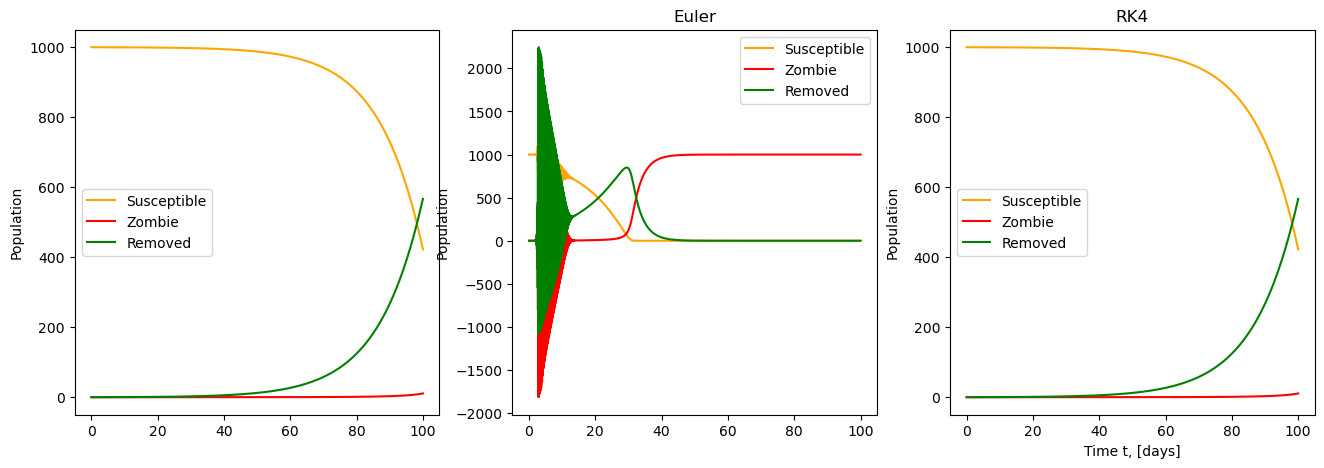

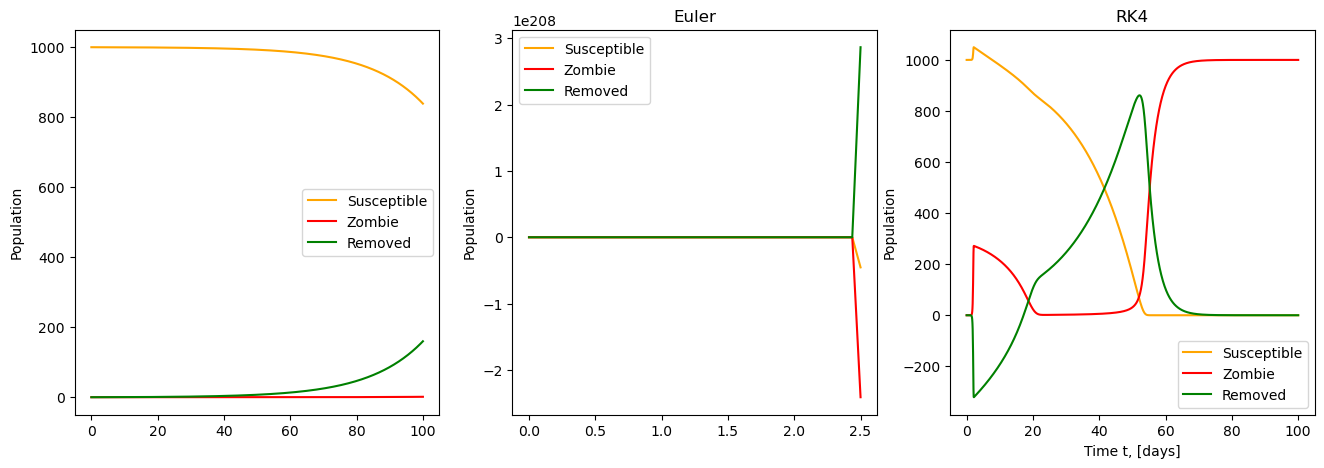

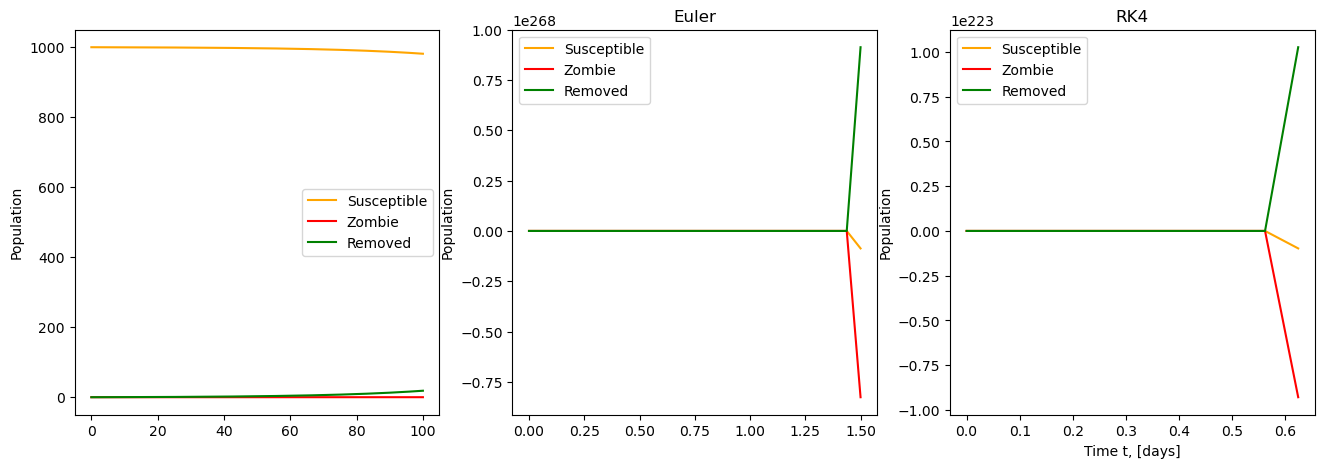

In [73]:
# Define parameters
Pi = 0.0000495      # natural birth rate (per day)
# Pi = [0.00001, 0.00003, 0.00004, 0.00005, 0.00006, 0.00009]
delta = 0.0000211  # natural death rate (per day)
# delta = [0.00001, 0.00002, 0.00003, 0.00004, 0.00009]
beta = 0.0095  # transmission rate  (per day)
# beta = [0.001, 0.003, 0.005, 0.007, 0.009]
# alpha = 0.03  # zombie final removal rate  (per day)
alpha = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1]
zeta = 0.33  #  resurrection percent (per day)
# zeta = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

S0 = 1000 #initial population
Z0, R0 = 0, 0
X0 = S0, Z0, R0
tmax = 100
Nt = 1600
t = np.linspace(0, tmax, Nt+1) #time grid

# for b in beta:
#     solve_and_graph(derivative, X0, t, Pi, delta, b, zeta, alpha)

for a in alpha:
    solve_and_graph(derivative, X0, t, Pi, delta, beta, zeta, a)

# for z in zeta:
#     solve_and_graph(derivative, X0, t, Pi, delta, beta, z, alpha)

# for p in Pi:
#     solve_and_graph(derivative, X0, t, p, delta, beta, zeta, alpha)

# for d in delta:
#     solve_and_graph(derivative, X0, t, Pi, d, beta, zeta, alpha)